In [1]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install pymssql
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

import model.utility.k_analysis_util as k_analysis_util

In [4]:
db_path = "/content/drive/MyDrive/Dev/Kjvan/kjdb_predict_result.accdb"


In [5]:

cmd = f"select * from PredictResults"
print(cmd)

select * from PredictResults


In [6]:
df_re = k_analysis_util.execute_mdb_sql(db_path, cmd)

Standard Output:

pr_program_id	pr_horse_id	pr_rank	pr_h1_pred	pr_h2_pred	pr_h3_pred	pr_h4_pred	pr_hE_pred	upd	pr_race	pr_odds	pr_vote
2025010606	2022100039	08	0.0107	0.1486	0.0585	0.3424	0.14005	1	01	2135	11
2025010606	2022100050	04	0.1503	0.1971	0.1886	0.9973	0.38333	1	01	0062	04
2025010606	2022101185	12	0.0401	0.2735	0.0391	0.1608	0.12838	1	01	0935	10
2025010606	2022101258	05	0.3323	0.1989	0.0207	0.9875	0.38485	1	01	0026	01
2025010606	2022101587	13	0.0374	0.1682	0.0521	0.9732	0.30772	1	01	0842	09
2025010606	2022101908	02	0.0617	0.162	0.0356	0.9734	0.30818	1	01	0182	07
2025010606	2022102321	06	0.07779999999999999	0.1837	0.0523	0.5921999999999999	0.2265	1	01	0347	08
2025010606	2022103333	16	0.007900000000000001	0.1321	0.0065	0.7475000000000001	0.2235	1	01	2527	13
2025010606	2022103758	10	0.2638	0.1135	0.0643	0.701	0.28565	1	01	0044	02
2025010606	2022104211	09	0.0212	0.1516	0.0038	0.9548	0.28285	1	01	2865	14
2025010606	2022104334	11	0.0142	0.1506	0.0203	0.6541	0.2098	1	01	3355	15
20250

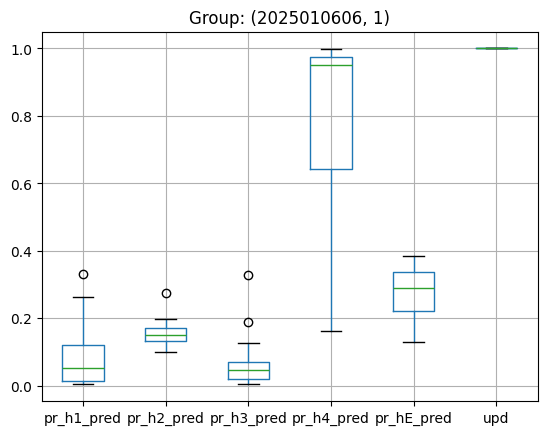

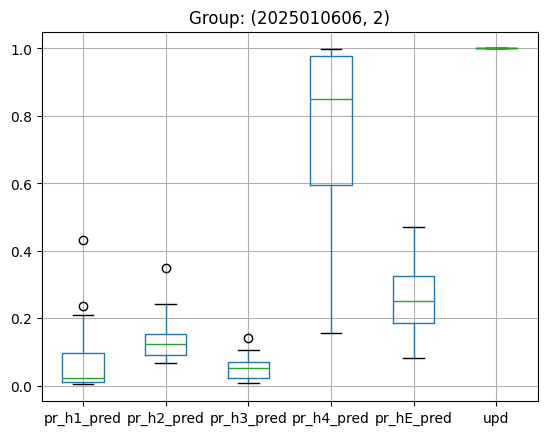

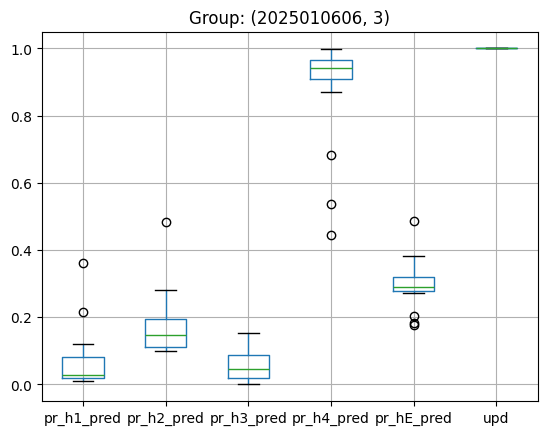

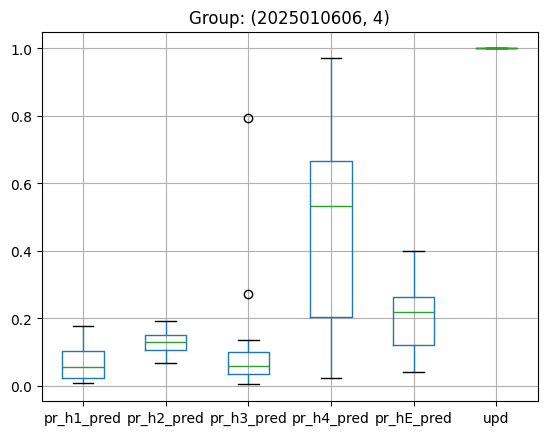

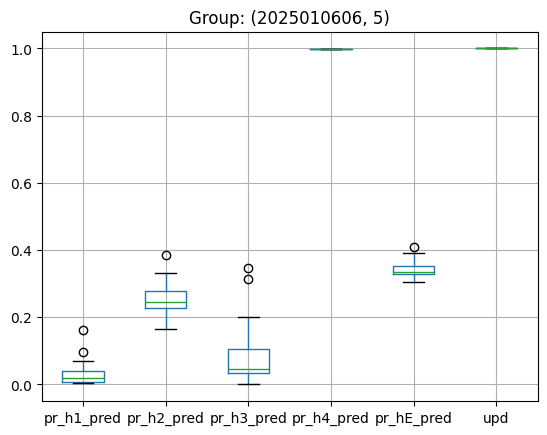

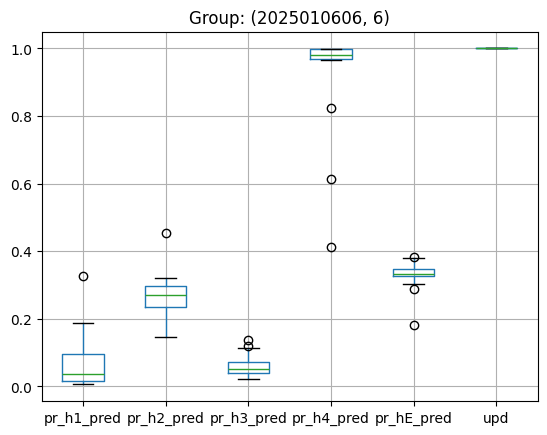

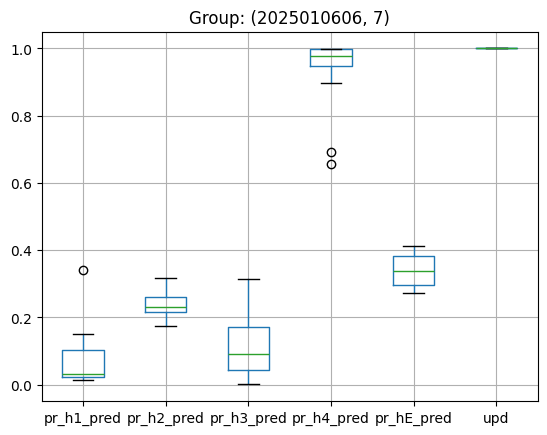

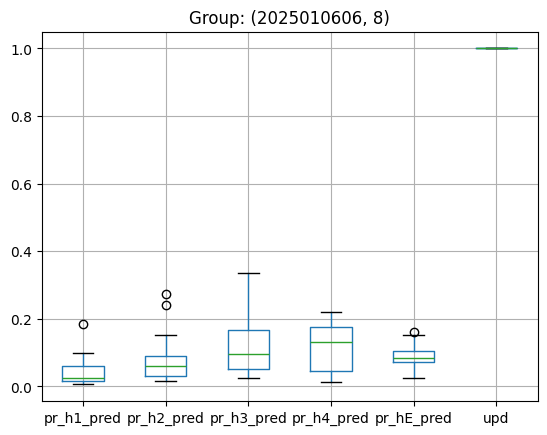

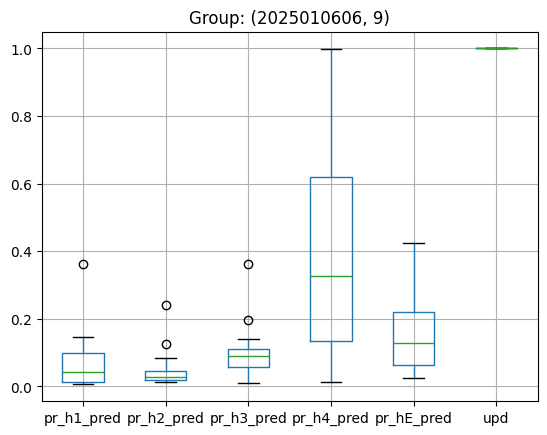

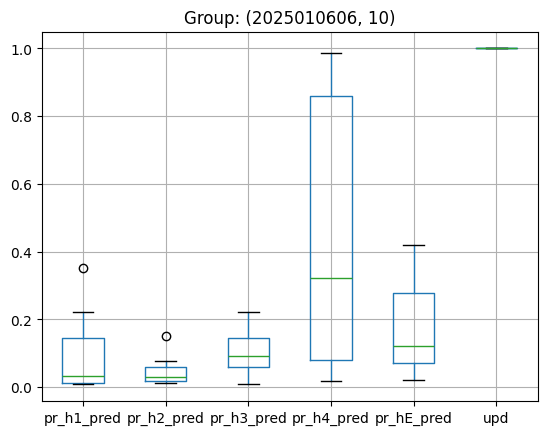

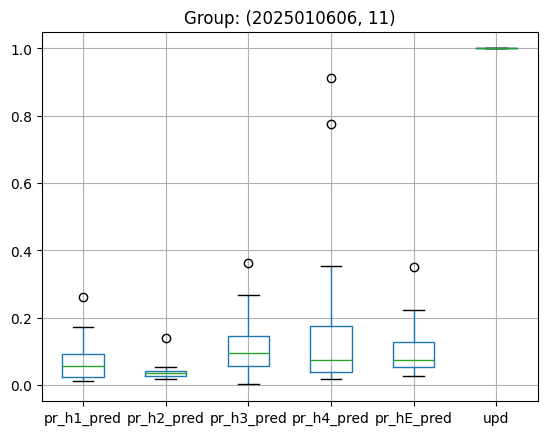

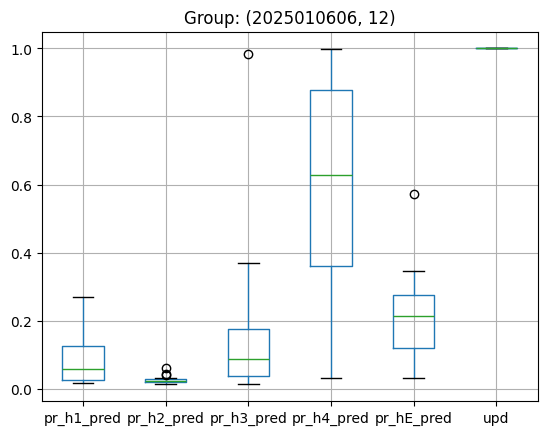

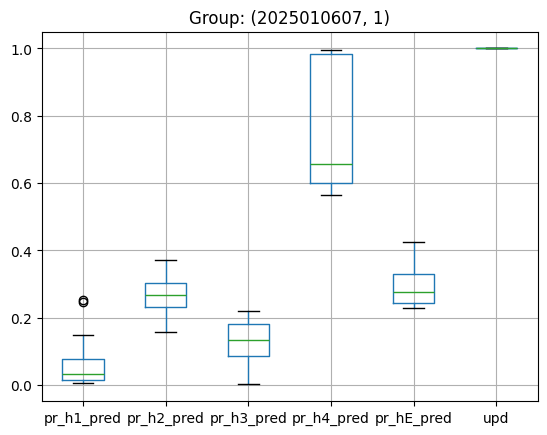

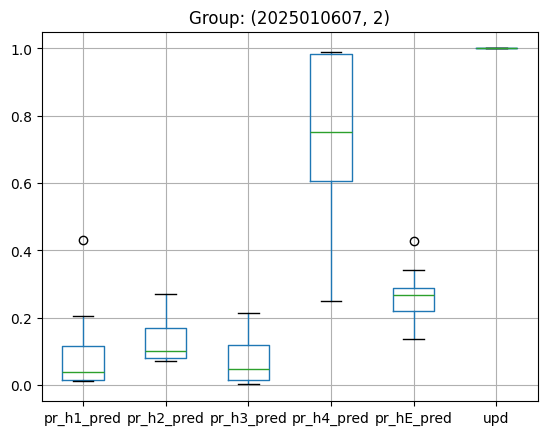

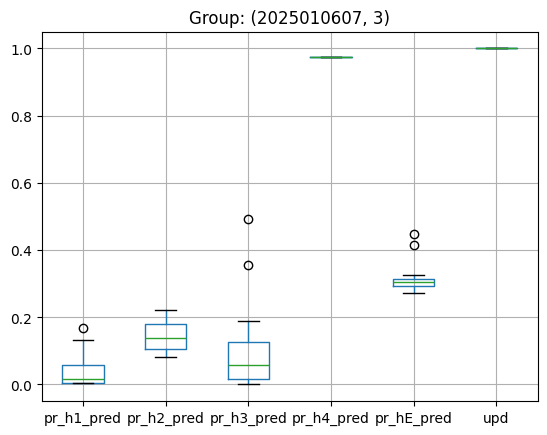

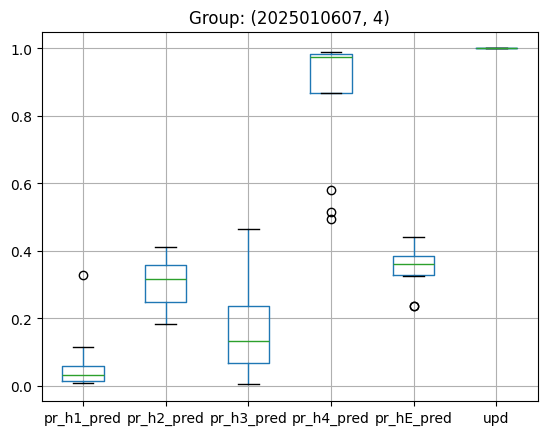

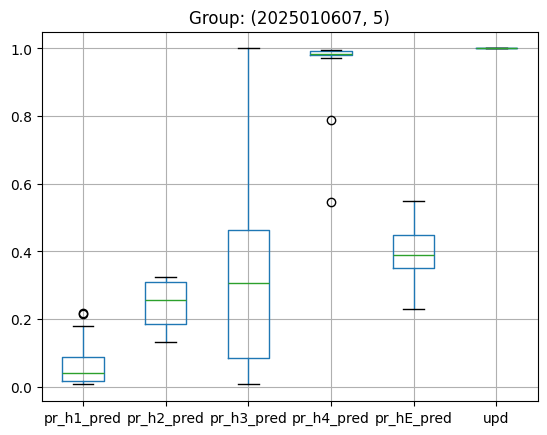

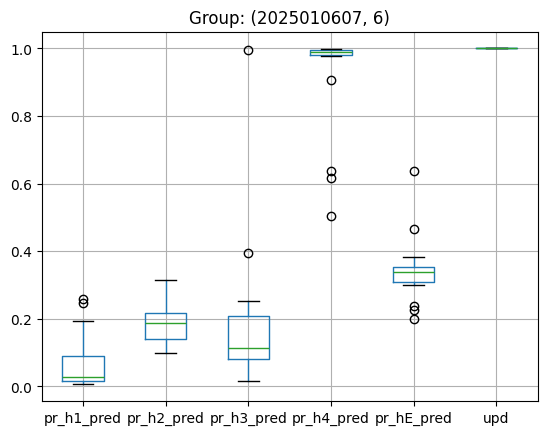

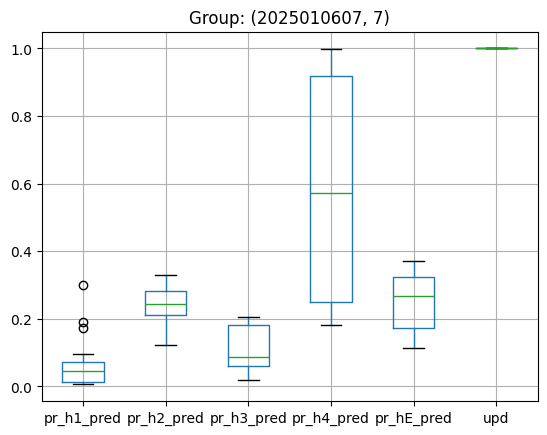

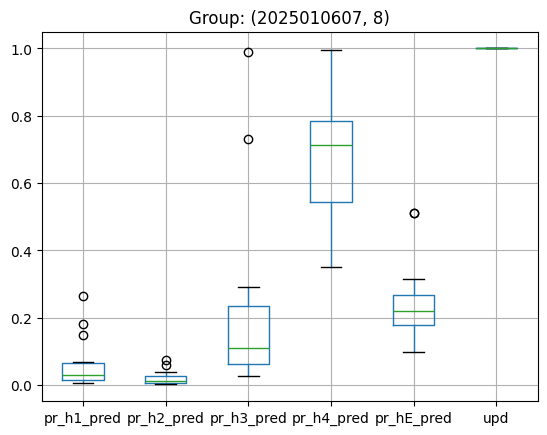

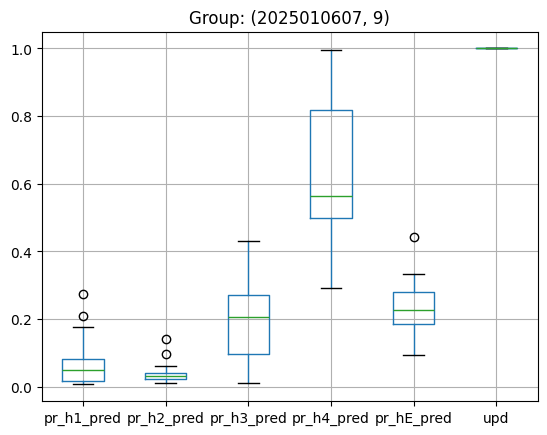

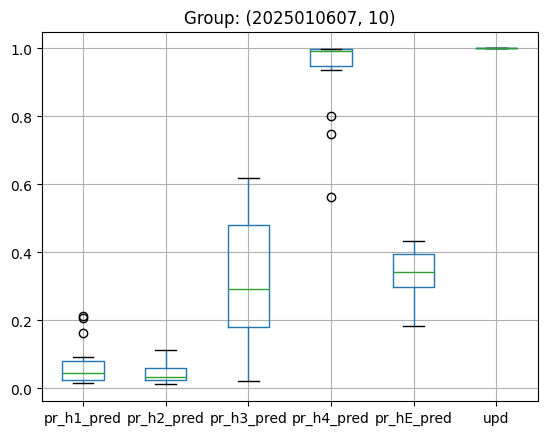

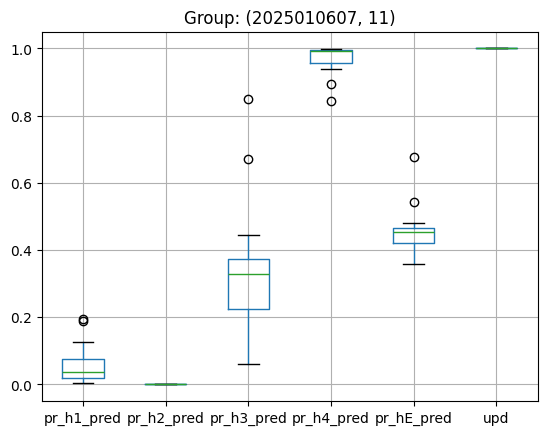

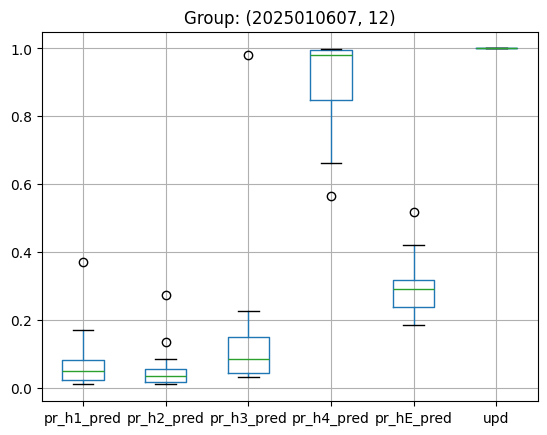

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# bt_place、bt_distance、bt_track_cdでグループ化
grouped = df_re.groupby(['pr_program_id', 'pr_race'])

# 各グループごとに箱ひげ図を描画
for group_name, group_df in grouped:
    plt.figure()
    group_df.drop([ 'pr_program_id', 'pr_race', 'pr_horse_id', 'pr_odds', 'pr_vote', 'pr_rank'], axis=1).boxplot()
    plt.title(f'Group: {group_name}')
    plt.show()


In [ ]:
import subprocess

def list_mdb_tables(mdb_file_path: str):
    cmd = ['mdb-tables', mdb_file_path]
    process = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    stdout, stderr = process.communicate()

    if process.returncode != 0:
        print(f"Error listing tables: {stderr}")
        return []

    tables = stdout.split()
    return tables

tables = list_mdb_tables(db_path)
print("Tables and Views:", tables)
